In [1]:
import ROOT

Welcome to JupyROOT 6.24/06



Applying ATLAS style settings...



Info in <TCanvas::Print>: pdf file Integral_check.pdf has been created


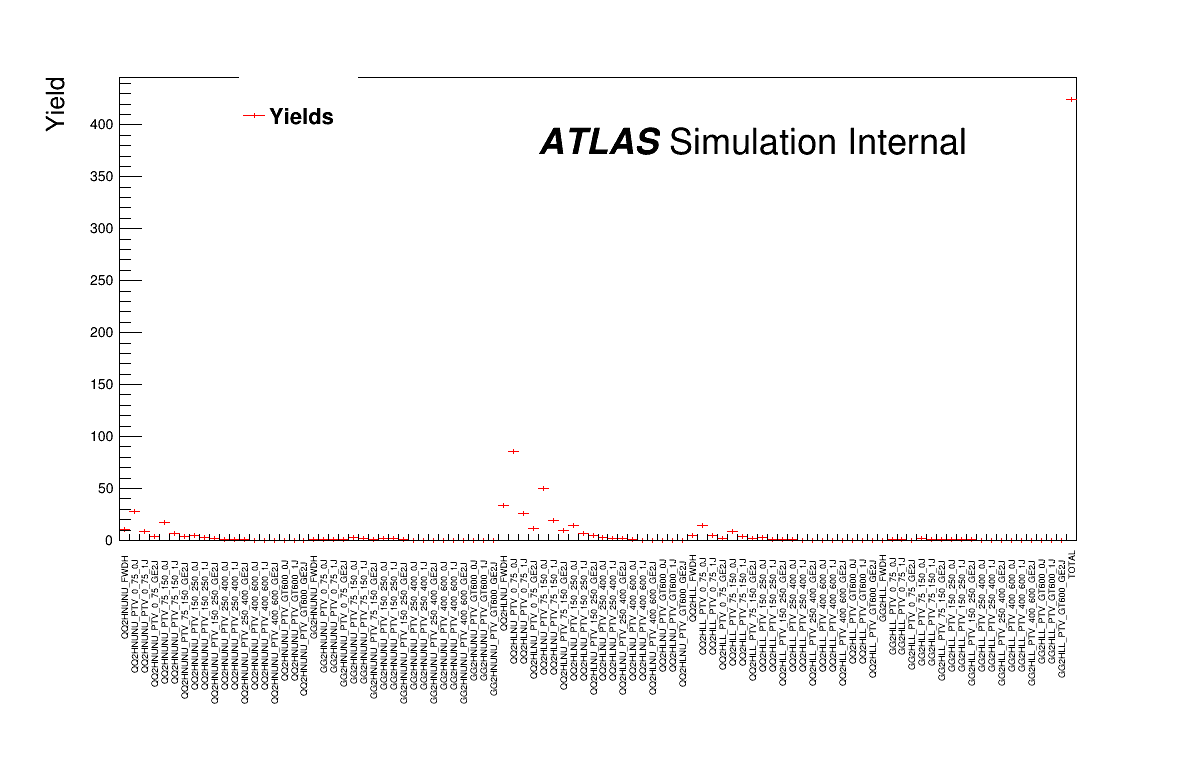

In [2]:
# infile=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_noreco_nominal_noPDFRW_22072024.root")
infile=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_nominal_noreco_06062024.root")
infilealt=ROOT.TFile.Open("/gpfs/mnt/atlasgpfs01/usatlas/data/pusharma/vhbb/stxs_uncertainity/inputs/hadded_nominal_noreco_06062024.root")
# h1=infile.Get("nomYields")
# h2=infilealt.Get("nomYields")

h0_name='ggZllH125_Stage1Bin_RecoMapEPSNicest'
hists=['ggZvvH125_Stage1Bin_RecoMapEPSNicest','qqWlvH125_Stage1Bin_RecoMapEPSNicest','qqZllH125_Stage1Bin_RecoMapEPSNicest','qqZvvH125_Stage1Bin_RecoMapEPSNicest']
# h2=infile.Get(f'PDF00/{h0_name}')
# for i in hists:
#     h2.Add(infile.Get(f'PDF00/{i}'))

h1=infile.Get(f'{h0_name}')
for i in hists:
    h1.Add(infile.Get(f'{i}'))

c1 = ROOT.TCanvas("c1","c1",1200,800)
ROOT.gStyle.SetPaintTextFormat("1.2f")
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(1)
ROOT.gROOT.SetBatch(1)
ROOT.gROOT.LoadMacro("/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/VHbbSTXSToolkit/macros/AtlasStyle.C")
ROOT.gROOT.LoadMacro("/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/VHbbSTXSToolkit/macros/AtlasUtils.C")
ROOT.gROOT.LoadMacro("/usatlas/u/pusharma/usatlasdata/vhbb/stxs_uncertainity/VHbbSTXSToolkit/macros/AtlasLabels.C")
ROOT.SetAtlasStyle()

c1.SetBottomMargin(0.3)
c1.SetLeftMargin(-0.2)
h1.SetStats(0)
h1.GetXaxis().SetLabelSize(0.02)
h1.GetYaxis().SetLabelSize(0.02)
h1.SetTickLength(0.01)
# h1.SetTitle("Uncertainty(PS)")
h1.SetTitle("Yield")
h1.SetMarkerSize(0.5)
h1.SetYTitle("Yield")
h1.SetTitleSize(0.05)
h1.SetLineColor(ROOT.kRed)
# h1.Divide(h2)
h1.SetMarkerColor(ROOT.kRed)
# h2.SetLineColor(ROOT.kBlue)
# h2.SetMarkerColor(ROOT.kBlue)
h1.SetAxisRange(0,150,"Y")
h1.SetMarkerStyle(2)
# h2.SetMarkerStyle(2)
h1.Scale(1/140)
# h2.Scale(1/140)
h1.Draw('E1')
# h2.SetMarkerSize(0.5)
# h2.Draw('E1 same')
ROOT.ATLASLabel( 0.45, 0.80,"Simulation Internal", 1 )
leg = ROOT.TLegend(.2,.8,.3,.9)

leg.AddEntry(h1, f"Yields")
# leg.AddEntry(h2, f"Old")
leg.Draw("SAME")
c1.SaveAs("Integral_check.pdf")
c1.Draw()


In [6]:
raw_xsec_Dict={}
for i in range(1, h1.GetNbinsX()+1):
    temp_label=h1.GetXaxis().GetBinLabel(i).split("_")
    if "FWDH" in h1.GetXaxis().GetBinLabel(i):    
        raw_xsec_Dict[f'{h1.GetXaxis().GetBinLabel(i)}']=h1.GetBinContent(i)